# Project 2: Ames Housing Data and Kaggle Challenge

Contents:

- Part 0: Python Imports
- Part 1: Data Imports
- Part 2: EDA, Preliminary Data Cleaning & Visualizations
- Part 3: Feature Engineering
- Part 4: Modeling
- Part 5: Predictions

## Part 0: Python Imports

In [94]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
import statsmodels.api as sm

## Part 1: Data Imports

In [181]:
train_data = pd.read_csv('datasets/train.csv')
test_data = pd.read_csv('datasets/test.csv')
#sample_data = pd.read_csv('datasets/sample_sub_reg.csv')

train_data.shape

(2051, 81)

In [ ]:
test_data.shape # one less column (dependent var) and about 30% of total dataset

In [ ]:
# checking to make sure that test and train data have the same columns - empty list means only last col. (outcome var) is missing in test_data
[train_data.columns[i] for i in range(len(train_data.columns)-1) if not train_data.columns[i] == test_data.columns[i]]

In [ ]:
plt.figure(figsize = (17,5))
train_data.isna().sum().plot(kind = 'bar')
plt.title('Counts of na values by column');

In [ ]:
# removing columns with at least 50% missing values (there are plenty features with complete info to choose from)
train_data.dropna(axis = 1, thresh = 0.5*len(train_data), inplace = True)
train_data.shape

In [ ]:
train_data.info()

## Part 2: EDA, Preliminary Data Cleaning & Visualizations

In [179]:
# copying original train data to analyze as I evolve my model:
train_data_orig = pd.read_csv('datasets/train.csv')

**Examining distribution of target variable(`SalePrice`)**

In [ ]:
plt.figure(figsize=(12,4))
plt.title('Histogram of property prices')
plt.hist(train_data['SalePrice'], bins = 50, color = 'brown')
plt.xlabel('SalePrice')
plt.ylabel('observation count')
plt.axvline(train_data_orig['SalePrice'].quantile(0.9), color = 'black');

In [ ]:
train_data_orig[train_data_orig['SalePrice']>train_data_orig['SalePrice'].quantile(0.9)].describe().T

**_NOTE: Can I get the vlines to be the same color as the hist?_**

In [ ]:
plt.figure(figsize=(12,4))
plt.title('Histogram of property prices, by year sold')
for yr in range(2006, 2011):
    plt.hist(train_data_orig[train_data_orig['Yr Sold']==yr]['SalePrice'], bins = 50, histtype = 'step', label = yr, )
    plt.axvline(train_data_orig[train_data_orig['Yr Sold']==yr]['SalePrice'].mean(), ls ='--')
plt.xlabel('SalePrice')
plt.ylabel('observation count')
plt.legend();

**Seeing if `Misc Feature` is associated with higher property value**

In [ ]:
train_data[train_data['Misc Feature'].notna()].groupby([ 'Misc Feature'])['Misc Val'].mean()

add dummies for Misc Feature and ?

In [ ]:
train_data[train_data['Misc Feature'].notna()]['SalePrice'].describe()

**Confirming association between all `Garage` variables**

In [ ]:
garage_cols = [col for col in train_data_orig.columns if "Garage" in col]
train_data[train_data_orig['Garage Qual'].isna()][garage_cols].tail()

**Confirming association between all `Basement` variables**

In [ ]:
bsmt_cols = [col for col in train_data.columns if "Bsmt" in col]
train_data[train_data['Bsmt Qual'].isna()][bsmt_cols].tail()

**Exploring association between target variable and `Neighborhood`**

In [ ]:
sns.catplot(data = train_data_orig.sort_values('SalePrice'), x = 'Neighborhood', y = 'SalePrice', aspect = 2.5)
plt.xticks(rotation=45);

In [ ]:
train_data_orig.groupby(['Neighborhood'])['SalePrice'].describe().sort_values('mean')

In [ ]:
sns.pairplot(data = train_data_orig, x_vars = ['Lot Area', 'Lot Frontage', 'Mas Vnr Area', 'Fireplaces', 'Yr Sold'], y_vars = ['SalePrice']);

#[col for col in train_data.columns if not col in X_3]

 'MS SubClass',
 'Street',
 'Alley',
 'Lot Shape',
 'Land Contour',
 'Utilities',
 'Lot Config',
 'Roof Matl',
 'Mas Vnr Type',
 'Bsmt Exposure',
 'BsmtFin Type 1',
 'BsmtFin SF 1',
 'BsmtFin Type 2',
 'BsmtFin SF 2',
 'Bsmt Unf SF',
 'Total Bsmt SF',
 'Heating',
 'Heating QC',
 '1st Flr SF',
 '2nd Flr SF',
 'Low Qual Fin SF',
 'Bsmt Full Bath',
 'Bsmt Half Bath',
 'Full Bath',
 'Half Bath',
 'Kitchen AbvGr',
 'TotRms AbvGrd',
 'Fireplaces',
 'Fireplace Qu',
 'Garage Type',
 'Garage Yr Blt',
 'Garage Finish',
 'Garage Area',
 'Wood Deck SF',
 'Open Porch SF',
 'Enclosed Porch',
 '3Ssn Porch',
 'Screen Porch',
 'Pool Area',
 'Pool QC',
 'Fence',
 'Misc Feature',
 'Misc Val',
 'Mo Sold',
 'Yr Sold',
 'Sale Type',

In [ ]:
sns.catplot(data = train_data_orig, x = 'MS SubClass', y = 'SalePrice'); # in model with PConc = 1

In [ ]:
sns.catplot(data = train_data, x = 'Foundation', y = 'SalePrice'); # in model with PConc = 1

In [ ]:
sns.catplot(data = train_data, x = 'House Style', y = 'SalePrice'); # in model with "Preferred"

In [ ]:
sns.catplot(data = train_data, x = 'Bldg Type', y = 'SalePrice'); # in model with 1Fam =1

In [ ]:
sns.catplot(data = train_data, x = 'Land Slope', y = 'SalePrice'); # not in model

In [ ]:
sns.catplot(data = train_data_orig, x = 'Condition 1', y = 'SalePrice'); # in model with Norm = 1

In [ ]:
sns.catplot(data = train_data, x = 'Functional', y = 'SalePrice'); # in model with ... = 1

In [ ]:
sns.catplot(data = train_data, x = 'Garage Type', y = 'SalePrice'); # in model with "Preferred"

In [ ]:
sns.catplot(data = train_data, x = 'Paved Drive', y = 'SalePrice'); # not in model

In [ ]:
sns.catplot(data = train_data, x = 'Sale Type', y = 'SalePrice');# in model as "Sold as new"

In [ ]:
sns.catplot(data = train_data, x = 'Exterior 1st', y = 'SalePrice', aspect = 2); # not in model

In [ ]:
sns.catplot(data = train_data, x = 'MS Zoning', y = 'SalePrice', aspect = 2); # not in model

In [ ]:
sns.catplot(data = train_data, x = 'Lot Config', y = 'SalePrice', aspect = 1); # not in model

In [ ]:
sns.catplot(data = train_data, x = 'Roof Style', y = 'SalePrice', aspect = 1); # not in model

In [ ]:
sns.catplot(data = train_data_orig, x = 'Heating QC', y = 'SalePrice', aspect = 1); # not in model

In [ ]:
sns.catplot(data = train_data_orig, x = 'Mas Vnr Type', y = 'SalePrice', aspect = 1); # not in model

In [ ]:
sns.catplot(data = train_data_orig, x = 'Fireplace Qu', y = 'SalePrice', aspect = 1); 

**Identifying potential _stratifier_ variables in dependent data**

In [ ]:
train_data_orig['Yr Sold'].value_counts()

In [ ]:
test_data['Yr Sold'].value_counts()

## Part 3: Feature Engineering

### Performing all cleaning and feature engineering steps on train data

Creating a `Bathrooms` variable by adding `Full Bath` and 0.5*`Half Bath`

In [186]:
train_data['Bathrooms'] = train_data['Full Bath'] + 0.5 * train_data['Half Bath']
#train_data[['Full Bath', 'Half Bath', 'Bathrooms']].head()

<ipython-input-186-4a31ba769cd6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Bathrooms'] = train_data['Full Bath'] + 0.5 * train_data['Half Bath']


Creating a binary `Pool` variable

In [187]:
train_data['Pool'] = train_data['Pool Area'].apply(lambda x: 1 if x > 0 else 0)
#train_data[train_data['Pool Area']>0][['Pool', 'Pool Area']].head()

<ipython-input-187-5a6418a3a352>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Pool'] = train_data['Pool Area'].apply(lambda x: 1 if x > 0 else 0)


Introducing a variable representing years since remodeling at the time of sale

In [188]:
train_data['Year Sold'] = train_data['Yr Sold'] # copying "year sold" to avoid errors post-dummification

<ipython-input-188-f4621e41978c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Year Sold'] = train_data['Yr Sold'] # copying "year sold" to avoid errors post-dummification


In [189]:
train_data['Yrs Since Constr or Remod'] = train_data['Yr Sold'] - train_data['Year Remod/Add']

<ipython-input-189-aa66e3cf2347>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Yrs Since Constr or Remod'] = train_data['Yr Sold'] - train_data['Year Remod/Add']


Introducing an "inflation factor" - a variable representing the # of years before the earliest sale in data and each sale _(the LR coefficient will be a proxy for inflation)_

In [190]:
train_data['Inflation Factor'] = train_data['Year Sold']-train_data['Year Sold'].min()

<ipython-input-190-1d4e45df01ee>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Inflation Factor'] = train_data['Year Sold']-train_data['Year Sold'].min()


Introducing a variable representing only square footage with high quality finish

In [191]:
train_data['HQ SF'] = train_data['Gr Liv Area'] - train_data['Low Qual Fin SF']

<ipython-input-191-7d200a5c9a46>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['HQ SF'] = train_data['Gr Liv Area'] - train_data['Low Qual Fin SF']


Constructing a variable representing proxity to positive location features (such as a park)

In [192]:
train_data['Proximity to Pos Feat'] = train_data['Condition 1'].apply(lambda x: 1 if x == 'PosN' or x == 'PosA' else 0) + train_data['Condition 2'].apply(lambda x: 1 if x == 'PosN' or x == 'PosA' else 0)

<ipython-input-192-3f8c5fc99ffb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Proximity to Pos Feat'] = train_data['Condition 1'].apply(lambda x: 1 if x == 'PosN' or x == 'PosA' else 0) + train_data['Condition 2'].apply(lambda x: 1 if x == 'PosN' or x == 'PosA' else 0)


Mapping ordinal variables to their numerical representation

In [193]:
# defining dictionaries for mapping of ordinal variables
five_scale_map = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 3, 'Po': 1}
six_scale_map = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0}

# mapping all ordinal variables to their numeric values
train_data['Heating QC'] = train_data['Heating QC'].map(five_scale_map) #- doesn't seem to be very useful in the model
train_data['Kitchen Qual'] = train_data['Kitchen Qual'].map(five_scale_map)
train_data['Exter Qual'] = train_data['Exter Qual'].map(five_scale_map)
train_data['Exter Cond'] = train_data['Exter Cond'].map(five_scale_map)
train_data['Exter Qual x Cond'] = train_data['Exter Qual']*train_data['Exter Cond']

train_data['Garage Qual'] = train_data['Garage Qual'].map(six_scale_map)
train_data['Garage Cond'] = train_data['Garage Cond'].map(six_scale_map)
train_data['Garage Qual x Cond'] = train_data['Garage Qual']*train_data['Garage Cond']
train_data['Garage Qual x Cond'].fillna(0, inplace = True)
train_data['Garage Qual'].fillna(0, inplace = True)
train_data['Garage Cond'].fillna(0, inplace = True)

train_data['Bsmt Qual'] = train_data['Bsmt Qual'].map(six_scale_map)
train_data['Bsmt Cond'] = train_data['Bsmt Cond'].map(six_scale_map)
train_data['Bsmt Qual x Cond'] = train_data['Bsmt Qual']*train_data['Bsmt Cond']
train_data['Bsmt Qual x Cond'].fillna(0, inplace = True)
train_data['Bsmt Qual'].fillna(0, inplace = True)
train_data['Bsmt Cond'].fillna(0, inplace = True)

train_data['Fireplace Qu'] = train_data['Fireplace Qu'].map(five_scale_map)

<ipython-input-193-841895784ab3>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Heating QC'] = train_data['Heating QC'].map(five_scale_map) #- doesn't seem to be very useful in the model
<ipython-input-193-841895784ab3>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Kitchen Qual'] = train_data['Kitchen Qual'].map(five_scale_map)
<ipython-input-193-841895784ab3>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

Creating dummy variables representing non-numerical characteristics of interest

In [194]:
train_data = pd.get_dummies(train_data, drop_first=False, columns = ['Bldg Type', #'House Style',
 'Roof Style', 'Exterior 1st', 'Exterior 2nd', 'Foundation', #'Bsmt Qual', #'Bsmt Cond',
 #'Bsmt Exposure', #'BsmtFin Type 1', #'BsmtFin Type 2', 
'Central Air', 'Electrical', 'Functional','Paved Drive', 'MS SubClass', 'Yr Sold'])

Grouping neighborhoods based on their general appeal as per average price per sqft

In [195]:
train_data['USD_per_sqft'] = train_data['SalePrice']/train_data['Gr Liv Area']

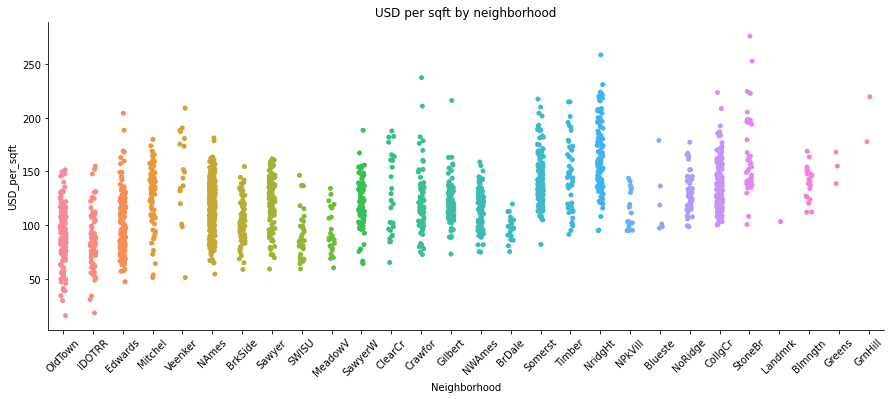

In [60]:
sns.catplot(data = train_data.sort_values('USD_per_sqft'), x = 'Neighborhood', y = 'USD_per_sqft', aspect = 2.5)
plt.xticks(rotation=45)
plt.title('USD per sqft by neighborhood');

In [145]:
train_data['USD_per_sqft'].describe()

count    2049.000000
mean      121.773111
std        32.207000
min        15.371394
25%       100.635593
50%       120.445344
75%       140.462889
max       276.250881
Name: USD_per_sqft, dtype: float64

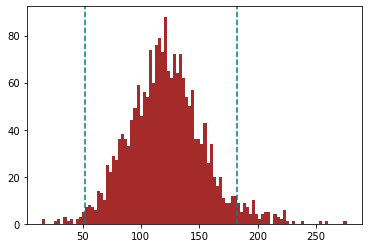

In [184]:
plt.hist(train_data['USD_per_sqft'], bins = 100, color = 'brown')
plt.axvline(train_data['USD_per_sqft'].quantile(0.99), ls = '--', color = 'teal')
plt.axvline(train_data['USD_per_sqft'].quantile(0.01), ls = '--', color = 'teal');

In [185]:
train_data = train_data[(train_data['USD_per_sqft']>train_data['USD_per_sqft'].quantile(0.01)) & (train_data['USD_per_sqft']<train_data['USD_per_sqft'].quantile(0.96))]

Engineering a column (`Good Nhood`) to represent neighborhood based on average `USD_per_sqft`

In [196]:
def good_nhood(neighborhood):
    if train_data[train_data['Neighborhood']==neighborhood]['USD_per_sqft'].mean() > train_data['USD_per_sqft'].quantile(0.75):
        return 3
    elif train_data[train_data['Neighborhood']==neighborhood]['USD_per_sqft'].mean() > train_data['USD_per_sqft'].quantile(0.5):
        return 2
    elif train_data[train_data['Neighborhood']==neighborhood]['USD_per_sqft'].mean() > train_data['USD_per_sqft'].quantile(0.25):
        return 1
    else:
        return 0

In [197]:
train_data['Good Nhood'] = train_data['Neighborhood'].apply(good_nhood)

Creating binary variables which indicate "prefferred" values of select features (those associated with higher prices, per EDA)

In [198]:
train_data['Pref House Style'] = train_data['House Style'].apply(lambda x: 1 if x == '2Story' or x == '1Story' else 0)
train_data['Pref Garage Type'] = train_data['Garage Type'].apply(lambda x: 1 if x == 'Attchd' or x == 'BuiltIn' else 0)
train_data['Sold as New'] = train_data['Sale Type'].apply(lambda x: 1 if x == 'New' else 0)
train_data['Gtl Land Slope'] = train_data['Land Slope'].apply(lambda x: 1 if x == 'Gtl' else 0)
train_data['Pref Lot Config'] = train_data['Lot Config'].apply(lambda x: 1 if x == 'CulDSac' or x == 'Inside' else 0)
train_data['Zone RL'] = train_data['MS Zoning'].apply(lambda x: 1 if x == 'RL' else 0)
train_data['Pref Mas Vnr'] = train_data['Mas Vnr Type'].apply(lambda x: 1 if x == 'BrkFace' or x == 'Stone' else 0)

Filling NaNs for select columns:<br>
_why some with 0 and one with mean?_

In [199]:
train_data['Mas Vnr Area'].fillna(train_data['Mas Vnr Area'].mean(), inplace= True)
train_data['Garage Cars'].fillna(0, inplace=True)
train_data['Garage Area'].fillna(0, inplace=True)
train_data['Lot Frontage'].fillna(0, inplace=True)
train_data['Fireplace Qu'].fillna(0,inplace = True)

Saving train data to csv

In [ ]:
train_data.to_csv('train_data_cleaned.csv')

## Part 4: Modeling

### 4.1: Baseline Model

A baseline model using only one dependent variable: `Gr Liv Area`

In [200]:
# creating independent variables (X) array and dependent variable y:
X_base = train_data[['Gr Liv Area']]
y_base = train_data['SalePrice']

# splitting data into a training set and test set:
X_train_base, X_test_base, y_train_base, y_test_base = train_test_split(X_base, y_base)

# instantiating, fitting, and scoring the baseline model:
lr_base = LinearRegression()
lr_base.fit(X_train_base,y_train_base)

LinearRegression()

In [201]:
print(f" The simple baseline model achieves an R2 of {lr_base.score(X_train_base,y_train_base).round(4)} on test data and an R2 of {lr_base.score(X_test_base, y_test_base).round(4)} on test data.")
print(f" The cross-validation score of the baseline model is {cross_val_score(lr_base, X_base, y_base).mean().round(4)}.")

 The simple baseline model achieves an R2 of 0.5791 on test data and an R2 of 0.6249 on test data.
 The cross-validation score of the baseline model is 0.5882.


In [48]:
base_pred = pd.DataFrame(y_base.T)
base_pred['PredPrice'] = lr_base.predict(X_base)
base_pred['Gr Liv Area'] = X_base['Gr Liv Area']
base_pred = base_pred.sort_values('SalePrice')
base_pred.head()

,SalePrice,PredPrice,Gr Liv Area
1628,12789,103758.051583,832
183,13100,92118.103448,733
1309,34900,90589.625411,720
1292,35000,64487.923533,498
1518,35311,62371.569327,480


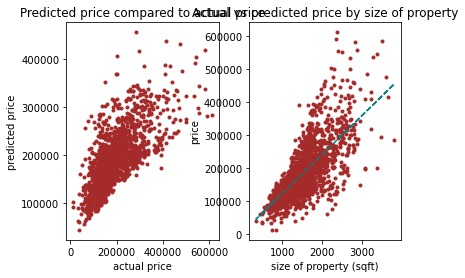

In [202]:
plt.subplot(1,2,1)

plt.scatter(base_pred['SalePrice'], base_pred['PredPrice'], color = 'brown', marker = ".")
plt.xlabel('actual price')
plt.ylabel('predicted price')
plt.title('Predicted price compared to actual price');
plt.subplot(1,2,2)

plt.plot(base_pred['Gr Liv Area'], base_pred['PredPrice'], color = 'teal', ls = '--')
plt.scatter(base_pred['Gr Liv Area'], base_pred['SalePrice'], color = 'brown', marker = ".")
plt.xlabel('size of property (sqft)')
plt.ylabel('price')
plt.title('Actual vs predicted price by size of property');

In [159]:
train_data = train_data[train_data['Gr Liv Area'] <= 4000]

...

In [138]:
base_pred[(base_pred['SalePrice'] < 39000) & (base_pred['PredPrice'] > 45000)]

,SalePrice,PredPrice,Gr Liv Area
1628,12789,103758.051583,832
183,13100,92118.103448,733
1309,34900,90589.625411,720
1292,35000,64487.923533,498
1518,35311,62371.569327,480
1564,37900,119748.283363,968


In [144]:
train_data.iloc[[1628, 183, 1309, 1292, 1518, 1564],:]

,Id,PID,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,USD_per_sqft,Good Nhood,Pref House Style,Pref Garage Type,Sold as New,Gtl Land Slope,Pref Lot Config,Zone RL,Pref Mas Vnr,HQ SF
1629,1625,527162090,RL,63.0,7875,Pave,NaN,Reg,Lvl,AllPub,...,140.462889,1,1,1,0,1,1,1,1,1253
183,1554,910251050,A (agr),80.0,14584,Pave,NaN,Reg,Low,AllPub,...,17.871760,0,1,1,0,0,1,0,0,733
1310,2612,535403040,RL,66.0,7800,Pave,NaN,IR1,Lvl,AllPub,...,126.096491,1,1,1,0,1,1,1,0,912
1293,1028,527357180,RL,0.0,12511,Pave,NaN,IR1,Lvl,AllPub,...,102.992958,1,1,1,0,1,0,1,1,2840
1519,2820,908103310,RL,38.0,7840,Pave,NaN,IR1,Lvl,AllPub,...,125.988142,1,0,0,0,1,1,1,1,1012
1565,2268,916455050,RL,0.0,6718,Pave,NaN,IR1,Lvl,AllPub,...,137.576220,3,1,1,0,1,1,1,1,1312


### 4.2: Model Iterations

#### 4.2.1: Model Iteration #1

Looking to enhance the model by adding some of the X variables which were available in original data or engineered in Part 3

In [203]:
X_1 = ['Gr Liv Area', 'Bedroom AbvGr', 'Bathrooms', 'Pool', 'Yrs Since Constr or Remod']

X_one = train_data[X_1]
y = train_data['SalePrice']

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_one, y)

mlr_1 = LinearRegression()
mlr_1.fit(X_train_1, y_train_1)

print(f"R2 on training data = {mlr_1.score(X_train_1, y_train_1).round(4)}")
print(f"R2 on test data = {mlr_1.score(X_test_1, y_test_1).round(4)}")
print(f"Average R2 in 5-fold cross-validation = {cross_val_score(mlr_1, X_one, y).mean().round(4)} (std of {cross_val_score(mlr_1, X_one, y).std().round(4)})")

R2 on training data = 0.7197
R2 on test data = 0.6838
Average R2 in 5-fold cross-validation = 0.7099 (std of 0.0247)


_**Observations:**_

- Including four additional variables: `Bedroom AbvGr`, `Bathrooms`, `Pool`, `Yrs Since Constr or Remod` increases the R2 coefficient by ~0.16 compared to the baseline model

#### 4.2.2: Model Iteration #2

Adding more dependent variables, scaling all non-binary X variables, and stratifying test and train sets using `Year Sold`

In [204]:
X_2 = ['HQ SF', 'Low Qual Fin SF', 'Bedroom AbvGr', 'Bathrooms', 'Pool', 'Yrs Since Constr or Remod', 'Kitchen Qual', 'Exter Qual', 'Exter Cond', 
       'Bldg Type_1Fam', 'Garage Cars', 'Functional_Typ', 'Overall Qual', 'Overall Cond', 'Inflation Factor', 'Good Nhood', 
       'Lot Area', 'Foundation_PConc', 'Garage Qual', 'Garage Cond', 'Bsmt Qual', 'Bsmt Cond', 
        'Pref Garage Type', 'Sold as New', 'Paved Drive_Y', 'Gtl Land Slope', 'Exterior 1st_VinylSd', 'Exterior 1st_CemntBd', 
       'Mas Vnr Area', 'Lot Frontage','Zone RL', 'Fireplaces', 'Fireplace Qu','Pref Lot Config', 'Roof Style_Hip', 
       'Heating QC', 'Electrical_SBrkr', 'Central Air_Y', '1st Flr SF', '2nd Flr SF', 'Garage Area', 'Yr Sold_2007', 
       'Yr Sold_2008', 'Yr Sold_2009', 'Yr Sold_2010', 'Year Sold', 'MS SubClass_30', 'MS SubClass_40',
       'MS SubClass_45', 'MS SubClass_50', 'MS SubClass_60', 'MS SubClass_70', 'MS SubClass_75', 'MS SubClass_80',
       'MS SubClass_85', 'MS SubClass_90', 'MS SubClass_120', 'MS SubClass_150', 'MS SubClass_160', 'MS SubClass_180',
        'MS SubClass_190']

X_two = train_data[X_2]

X_2_bin = [col for col in X_2 if X_two[col].dtype == 'uint8'] # binary vars
X_2_other = [col for col in X_2 if X_two[col].dtype != 'uint8'] #non-binary vars

X_two_bin = train_data[X_2_bin]
X_two_other = train_data[X_2_other]
y = train_data['SalePrice']

scaler = StandardScaler()
X_two_other_sc = scaler.fit_transform(X_two_other)
X_two_other_sc_df = pd.DataFrame(data = X_two_other_sc, columns = X_2_other)
X_two = pd.concat([X_two_other_sc_df,X_two_bin.reset_index(drop=True)], axis = 1)

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_two, y, stratify = X_two['Year Sold'])

mlr_2 = LinearRegression()
mlr_2.fit(X_train_2, y_train_2)

print(f"R2 on training data = {mlr_2.score(X_train_2, y_train_2).round(4)}")
print(f"R2 on test data = {mlr_2.score(X_test_2, y_test_2).round(4)}")

print(f"Average R2 in 5-fold cross-validation = {cross_val_score(mlr_2, X_two, y).mean().round(4)} (std of {cross_val_score(mlr_2, X_two, y).std().round(4)})")

R2 on training data = 0.8916
R2 on test data = 0.8968
Average R2 in 5-fold cross-validation = 0.8819 (std of 0.0076)


In [135]:
mlr2_pred = pd.DataFrame(y.T)
mlr2_pred['PredPrice'] = mlr_2.predict(X_two)
#mlr2_pred['Gr Liv Area'] = X_two['Gr Liv Area']
mlr2_pred = base_pred.sort_values('SalePrice')
mlr2_pred.head()

,SalePrice,PredPrice,Gr Liv Area
1628,12789,103758.051583,832
183,13100,92118.103448,733
1309,34900,90589.625411,720
1292,35000,64487.923533,498
1518,35311,62371.569327,480


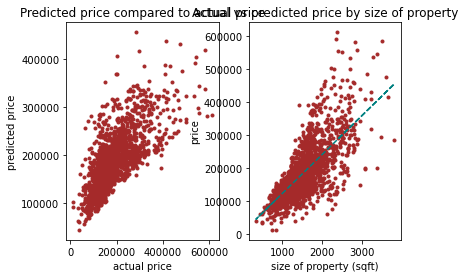

In [205]:
plt.subplot(1,2,1)

plt.scatter(mlr2_pred['SalePrice'], mlr2_pred['PredPrice'], color = 'brown', marker = ".")
plt.xlabel('actual price')
plt.ylabel('predicted price')
plt.title('Predicted price compared to actual price');
plt.subplot(1,2,2)

plt.plot(mlr2_pred['Gr Liv Area'], mlr2_pred['PredPrice'], color = 'teal', ls = '--')
plt.scatter(mlr2_pred['Gr Liv Area'], mlr2_pred['SalePrice'], color = 'brown', marker = ".")
plt.xlabel('size of property (sqft)')
plt.ylabel('price')
plt.title('Actual vs predicted price by size of property');

Training a model with the same variables only on properties within the 90th percentile (not on the long tail) to see if it improves cross-validation score

In [165]:
train_data_typical = train_data[train_data['SalePrice']<train_data['SalePrice'].quantile(0.9)]

X_three = train_data_typical[X_2]

X_three_bin = train_data_typical[X_2_bin]
X_three_other = train_data_typical[X_2_other]
y = train_data_typical['SalePrice']

scaler = StandardScaler()
X_three_other_sc = scaler.fit_transform(X_three_other)
X_three_other_sc_df = pd.DataFrame(data = X_three_other_sc, columns = X_2_other)
X_three = pd.concat([X_three_other_sc_df,X_three_bin.reset_index(drop=True)], axis = 1)

X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_three, y, stratify = X_three['Year Sold'])

mlr_3 = LinearRegression()
mlr_3.fit(X_train_3, y_train_3)

print(f"R2 on training data = {mlr_3.score(X_train_3, y_train_3).round(4)}")
print(f"R2 on test data = {mlr_3.score(X_test_3, y_test_3).round(4)}")

print(f"Average R2 in 5-fold cross-validation = {cross_val_score(mlr_3, X_three, y).mean().round(4)} (std of {cross_val_score(mlr_3, X_three, y).std().round(4)})")

R2 on training data = 0.875
R2 on test data = 0.8691
Average R2 in 5-fold cross-validation = 0.8594 (std of 0.0271)


_**Observations**_

- Removing "outlier" observations (properties in top 10% of `SalePrice`) from training dataset reduces the model's R2 

#### 4. 3 Model Iteration #3

Removing X variables with p-values > 0.05 (iterative operation based on OLS Regression Results report from SM)

`Central Air_Y`, _missed one_, `MS Subclass 30`, `Exterior 1st_VinylSd`, `MS SubClass_85`, `Bldg Type_1Fam`, `MS SubClass_40`, `Exter Cond`, `Heating QC` (_removing this one reduced R2 slightly_), `Electrical_SBrkr`, `Yrs Since Constr or Remod`, `Pref Garage Type`, `MS SubClass_75`, `MS SubClass_180`, `Lot Frontage`, `MS SubClass_190`, `MS SubClass_50`. `Bathrooms`, `Garage Qual`, `Foundation_PConc`, `MS SubClass_60`, `MS SubClass_80`, `Fireplace Qu`, `Paved Drive_Y`, `MS SubClass_150`

In [206]:
X_5 = ['HQ SF', 'Low Qual Fin SF', 'Bedroom AbvGr', 'Pool', 'Kitchen Qual', 'Exter Qual', 
       'Garage Cars', 'Functional_Typ', 'Overall Qual', 'Overall Cond', 'Inflation Factor', 'Good Nhood', 
       'Lot Area', 'Garage Cond', 'Bsmt Qual', 'Bsmt Cond', 
        'Sold as New', 'Gtl Land Slope', 'Exterior 1st_CemntBd', 
       'Mas Vnr Area', 'Zone RL', 'Fireplaces','Pref Lot Config', 'Roof Style_Hip', 
        '1st Flr SF', '2nd Flr SF', 'Garage Area', 'Yr Sold_2007', 
       'Yr Sold_2008', 'Yr Sold_2009', 'Yr Sold_2010', 'Year Sold', 'MS SubClass_70', 
       'MS SubClass_90', 'MS SubClass_120', 'MS SubClass_160']

X_five = train_data[X_5]

X_5_bin = [col for col in X_5 if X_five[col].dtype == 'uint8'] # binary vars
X_5_other = [col for col in X_5 if X_five[col].dtype != 'uint8'] #non-binary vars

X_five_bin = train_data[X_5_bin]
X_five_other = train_data[X_5_other]
y = train_data['SalePrice']

scaler = StandardScaler()
X_five_other_sc = scaler.fit_transform(X_five_other)
X_five_other_sc_df = pd.DataFrame(data = X_five_other_sc, columns = X_5_other)
X_five = pd.concat([X_five_other_sc_df,X_five_bin.reset_index(drop=True)], axis = 1)

X_train_5, X_test_5, y_train_5, y_test_5 = train_test_split(X_five, y, stratify = X_five['Year Sold'])

mlr_5 = LinearRegression()
mlr_5.fit(X_train_5, y_train_5)

print(f"R2 on training data = {mlr_5.score(X_train_5, y_train_5).round(4)}")
print(f"R2 on test data = {mlr_5.score(X_test_5, y_test_5).round(4)}")

print(f"Average R2 in 5-fold cross-validation = {cross_val_score(mlr_5, X_five, y).mean().round(4)} (std of {cross_val_score(mlr_5, X_five, y).std().round(4)})")

R2 on training data = 0.8893
R2 on test data = 0.8901
Average R2 in 5-fold cross-validation = 0.8814 (std of 0.0071)


In [167]:
X_five_ = X_five
X_five_ = sm.add_constant(X_five_)
y = train_data['SalePrice']

model = sm.OLS(y,X_five_).fit()

ValueError: The indices for endog and exog are not aligned

**_Observations:_**

- Linear Regression estimator mlr_5 achieves a higher cross-validation R2 score than mlr_3, despite accounting for 36 of all 61 dependent variables included in the latter

#### 4. 4 Model Iteration #4

Regularization with Ridge 

#### ... Optimizing Ridge using Gridsearch

In [207]:
pipe_ridge = Pipeline([
    ('ridge', Ridge())
])

pipe_r_params = {'ridge__alpha': list(np.logspace(0, 100, 500))}

pipe_gridsearch = GridSearchCV(pipe_ridge,pipe_r_params, cv=5,verbose=1)

gridsearch_results = pipe_gridsearch.fit(X_five, y)
best_ridge_est = gridsearch_results.best_estimator_

print(f"The best score of {gridsearch_results.best_score_} is achieved by {best_ridge_est}")

Fitting 5 folds for each of 500 candidates, totalling 2500 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


The best score of 0.8814965623481325 is achieved by Pipeline(steps=[('ridge', Ridge(alpha=3.9921091297480524))])


[Parallel(n_jobs=1)]: Done 2500 out of 2500 | elapsed:   13.1s finished


In [208]:
best_ridge_est.fit(X_train_5, y_train_5)

print(f"R2 on training data = {best_ridge_est.score(X_train_5, y_train_5).round(4)}")
print(f"R2 on test data = {best_ridge_est.score(X_test_5, y_test_5).round(4)}")
print(f"Average R2 in 5-fold cross-validation = {cross_val_score(best_ridge_est, X_five, y).mean().round(4)} (std of {cross_val_score(best_ridge_est, X_five, y).std().round(4)})")

R2 on training data = 0.8892
R2 on test data = 0.89
Average R2 in 5-fold cross-validation = 0.8815 (std of 0.0075)


#### 4. 5 Model Iteration #5

Regularization with Lasso

#### ... Optimizing alpha (lambda) using Gridsearch

In [209]:
pipe_lasso = Pipeline([
    ('lasso', Lasso())
])

pipe_l_params = {'lasso__alpha': list(np.logspace(0, 100, 500))}

pipe_gridsearch = GridSearchCV(pipe_lasso,pipe_l_params, cv=5,verbose=1)

gridsearch_results = pipe_gridsearch.fit(X_five, y)
best_lasso_est = gridsearch_results.best_estimator_

print(f"The best score of {gridsearch_results.best_score_} is achieved by {best_lasso_est}")

Fitting 5 folds for each of 500 candidates, totalling 2500 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/martalew/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 113280987859.38306, tolerance: 693071315.9690557
  model = cd_fast.enet_coordinate_descent(
/Users/martalew/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 122462489967.63806, tolerance: 722188639.0547088
  model = cd_fast.enet_coordinate_descent(
/Users/martalew/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 123970968331.90802, tolerance: 716977477.0696435
  model = cd_fast.enet_coordinate_d

The best score of 0.8814162769093654 is achieved by Pipeline(steps=[('lasso', Lasso())])


[Parallel(n_jobs=1)]: Done 2500 out of 2500 | elapsed:   14.1s finished
/Users/martalew/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 149967163144.77087, tolerance: 880046345.0764004
  model = cd_fast.enet_coordinate_descent(


In [210]:
best_lasso_est.fit(X_train_5, y_train_5)

print(f"R2 on training data = {best_lasso_est.score(X_train_5, y_train_5).round(4)}")
print(f"R2 on test data = {best_lasso_est.score(X_test_5, y_test_5).round(4)}")
print(f"Average R2 in 5-fold cross-validation = {cross_val_score(best_lasso_est, X_five, y).mean().round(4)} (std of {cross_val_score(best_lasso_est, X_five, y).std().round(4)})")

/Users/martalew/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 117576609414.5086, tolerance: 684428294.4516138
  model = cd_fast.enet_coordinate_descent(
/Users/martalew/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 113280987859.38306, tolerance: 693071315.9690557
  model = cd_fast.enet_coordinate_descent(
/Users/martalew/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 122462489967.63806, tolerance: 722188639.0547088
  model = cd_fast.enet_coordinate_descent(
/Users/martalew/anaconda3/lib/python3.8/site-packages/sklearn/linear_model

R2 on training data = 0.8893
R2 on test data = 0.8901


/Users/martalew/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 117602155774.17572, tolerance: 699678865.024329
  model = cd_fast.enet_coordinate_descent(
/Users/martalew/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 118377747508.36743, tolerance: 687782672.0153775
  model = cd_fast.enet_coordinate_descent(
/Users/martalew/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 113280987859.38306, tolerance: 693071315.9690557
  model = cd_fast.enet_coordinate_descent(
/Users/martalew/anaconda3/lib/python3.8/site-packages/sklearn/linear_model

Average R2 in 5-fold cross-validation = 0.8814 (std of 0.0072)


/Users/martalew/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 118377747508.36743, tolerance: 687782672.0153775
  model = cd_fast.enet_coordinate_descent(


In [ ]:
pipe_lr = Pipeline([
    ('sc', StandardScaler()),
    ('lr', LinearRegression())
])

#pipe1.get_params()

## Part 5: Predictions

#### 5.1 Performing all cleaning and feature engineering steps on "test data"

The code below reproduces steps defined and executed in Part 3 (Feature Engineering) on "test data" to prepare it for application of the estimator

In [172]:
test_data['Bathrooms'] = test_data['Full Bath'] + 0.5 * test_data['Half Bath']
test_data['Pool'] = test_data['Pool Area'].apply(lambda x: 1 if x > 0 else 0)
test_data['Yrs Since Constr or Remod'] = test_data['Yr Sold'] - test_data['Year Remod/Add']
test_data['HQ SF'] = test_data['Gr Liv Area'] - test_data['Low Qual Fin SF']

test_data['Heating QC'] = test_data['Heating QC'].map(five_scale_map)
test_data['Kitchen Qual'] = test_data['Kitchen Qual'].map(five_scale_map)
test_data['Exter Qual'] = test_data['Exter Qual'].map(five_scale_map)
test_data['Exter Cond'] = test_data['Exter Cond'].map(five_scale_map)
test_data['Exter Qual x Cond'] = test_data['Exter Qual']*test_data['Exter Cond']

test_data['Garage Qual'] = test_data['Garage Qual'].map(six_scale_map)
test_data['Garage Cond'] = test_data['Garage Cond'].map(six_scale_map)
test_data['Garage Qual x Cond'] = test_data['Garage Qual']*test_data['Garage Cond']
test_data['Garage Qual x Cond'].fillna(0, inplace = True)
test_data['Garage Qual'].fillna(0, inplace = True)
test_data['Garage Cond'].fillna(0, inplace = True)

test_data['Bsmt Qual'] = test_data['Bsmt Qual'].map(six_scale_map)
test_data['Bsmt Cond'] = test_data['Bsmt Cond'].map(six_scale_map)
test_data['Bsmt Qual x Cond'] = test_data['Bsmt Qual']*test_data['Bsmt Cond']
test_data['Bsmt Qual x Cond'].fillna(0, inplace = True)
test_data['Bsmt Qual'].fillna(0, inplace = True)
test_data['Bsmt Cond'].fillna(0, inplace = True)

test_data['Fireplace Qu'] = test_data['Fireplace Qu'].map(five_scale_map)
test_data['Fireplace Qu'].fillna(0, inplace = True)

test_data['Year Sold'] = test_data['Yr Sold']
test_data['Proximity to Pos Feat'] = test_data['Condition 1'].apply(lambda x: 1 if x == 'PosN' or x == 'PosA' else 0) +test_data['Condition 2'].apply(lambda x: 1 if x == 'PosN' or x == 'PosA' else 0)
test_data['Inflation Factor'] = test_data['Year Sold']-train_data['Year Sold'].min()

test_data['Good Nhood'] = test_data['Neighborhood'].apply(good_nhood)

test_data['Pref House Style'] = test_data['House Style'].apply(lambda x: 1 if x == '2Story' or x == '1Story' else 0)
test_data['Pref Garage Type'] = test_data['Garage Type'].apply(lambda x: 1 if x == 'Attchd' or x == 'BuiltIn' else 0)
test_data['Pref Mas Vnr'] = test_data['Mas Vnr Type'].apply(lambda x: 1 if x == 'BrkFace' or x == 'Stone' else 0)
test_data['Sold as New'] = test_data['Sale Type'].apply(lambda x: 1 if x == 'New' else 0)
test_data['Gtl Land Slope'] = test_data['Land Slope'].apply(lambda x: 1 if x == 'Gtl' else 0)
test_data['Pref Lot Config'] = test_data['Lot Config'].apply(lambda x: 1 if x == 'CulDSac' or x == 'Inside' else 0)
test_data['Zone RL'] = test_data['MS Zoning'].apply(lambda x: 1 if x == 'RL' else 0)

test_data = pd.get_dummies(test_data, drop_first=False, columns = ['MS SubClass','Yr Sold','Electrical', 'Central Air', 'Roof Style','Bldg Type', 'Functional', 'Foundation', 'Exterior 1st','Paved Drive'])

test_data['Mas Vnr Area'].fillna(train_data['Mas Vnr Area'].mean(), inplace= True)
test_data['Garage Cars'].fillna(0, inplace = True)
test_data['Garage Area'].fillna(0, inplace = True)
test_data['Lot Frontage'].fillna(0, inplace = True)

test_data.to_csv('test_data_cleaned.csv')

#### 5.2 Selecting the best estimator based on cross-validation score

In [173]:
estimators = [lr_base, mlr_1, mlr_2, mlr_3, mlr_5, best_ridge_est, best_lasso_est]
best_est = lr_base #baseline
for est in estimators:
    if cross_val_score(est, X_five, y).mean() > cross_val_score(best_est, X_five, y).mean():
        best_est = est
        
best_est

/Users/martalew/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 50265774265.089355, tolerance: 873048034.1779175
  model = cd_fast.enet_coordinate_descent(
/Users/martalew/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 56303578038.22424, tolerance: 888343959.9177041
  model = cd_fast.enet_coordinate_descent(
/Users/martalew/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 56375996021.44226, tolerance: 887808231.8551683
  model = cd_fast.enet_coordinate_descent(
/Users/martalew/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/

Pipeline(steps=[('ridge', Ridge(alpha=6.332908400455116))])

#### 5.3 Creating scaled X variables from "test data"

In [174]:
X_five_test = test_data[X_5]

X_5_test_bin = [col for col in X_5 if test_data[col].dtype == 'uint8'] # binary vars
X_5_test_other = [col for col in X_5 if test_data[col].dtype != 'uint8'] #non-binary vars

X_five_test_bin = test_data[X_5_bin]
X_five_test_other = test_data[X_5_other]

scaler = StandardScaler()
X_five_test_other_sc = scaler.fit_transform(X_five_test_other)
X_five_test_other_sc_df = pd.DataFrame(data = X_five_test_other_sc, columns = X_5_other)
X_five_test = pd.concat([X_five_test_other_sc_df,X_five_test_bin.reset_index(drop=True)], axis = 1)

####  5.4 Applying the best model to "test data" and formatting submission file

In [175]:
best_est_preds = best_est.predict(X_five_test)
test_data['SalePrice'] = best_est_preds
submission = test_data[['Id', 'SalePrice']].copy()
submission.head()

,Id,SalePrice
0,2658,160713.656541
1,2718,173726.197685
2,2414,200437.104179
3,1989,116603.753915
4,625,175693.566803


In [176]:
submission.to_csv('./datasets/submission_9.csv', index = False)